In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error


In [2]:
# Charger les différents ensembles de données

train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

oil_data = pd.read_csv('oil.csv')

stores_data = pd.read_csv('stores.csv')

transactions_data = pd.read_csv('transactions.csv')

holidays_data = pd.read_csv('holidays_events.csv')

In [3]:
# Afficher les premières lignes et quelques dernières lignes de chaque ensemble de données
print("Train Data:")
print(train_data.head())
print(train_data.tail())

print("\nTest Data:")
print(test_data.head())
print(test_data.tail())

print("\nOil Data:")
print(oil_data.head())
print(oil_data.tail())

print("\nStores Data:")
print(stores_data.head())
print(stores_data.tail())

print("\nTransactions Data:")
print(transactions_data.head())
print(transactions_data.tail())

print("\nHolidays Data:")
print(holidays_data.head())
print(holidays_data.tail())


Train Data:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
              id        date  store_nbr                      family     sales  \
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0

In [4]:
# Créer un DataFrame "calendar" avec une séquence de dates
data = pd.date_range('2013-01-01', '2017-08-31')
calendar = pd.DataFrame(data, columns=['date'])

calendar


,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1699,2017-08-27
1700,2017-08-28
1701,2017-08-29
1702,2017-08-30


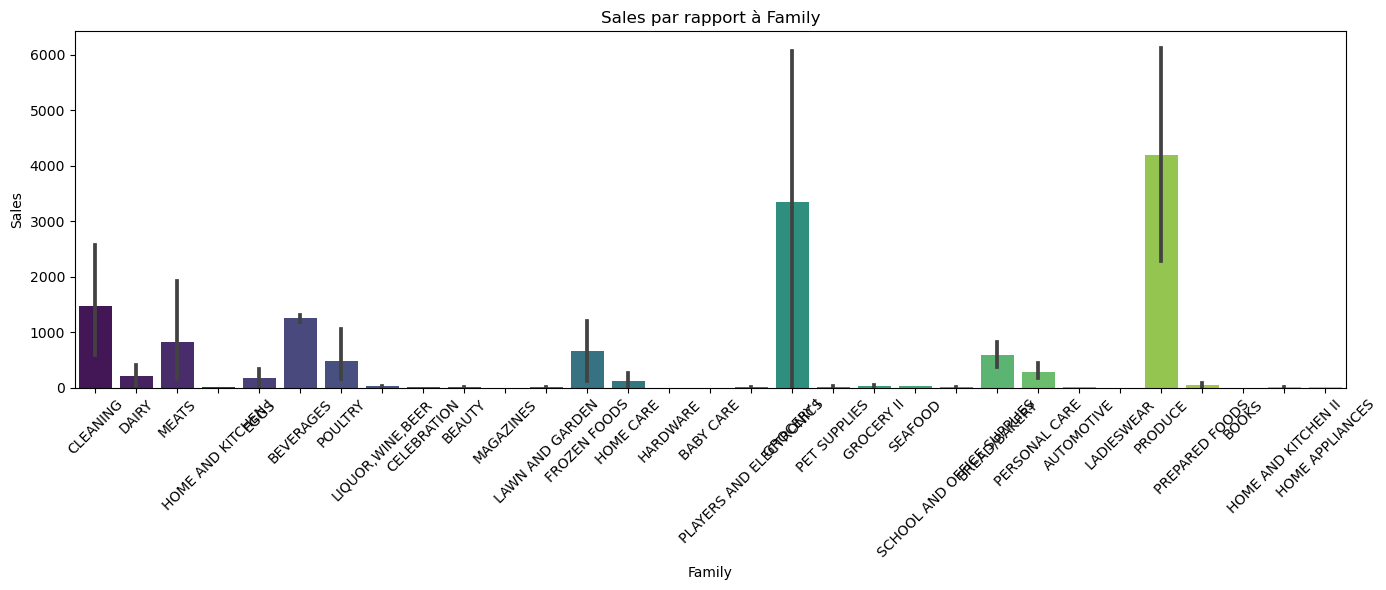

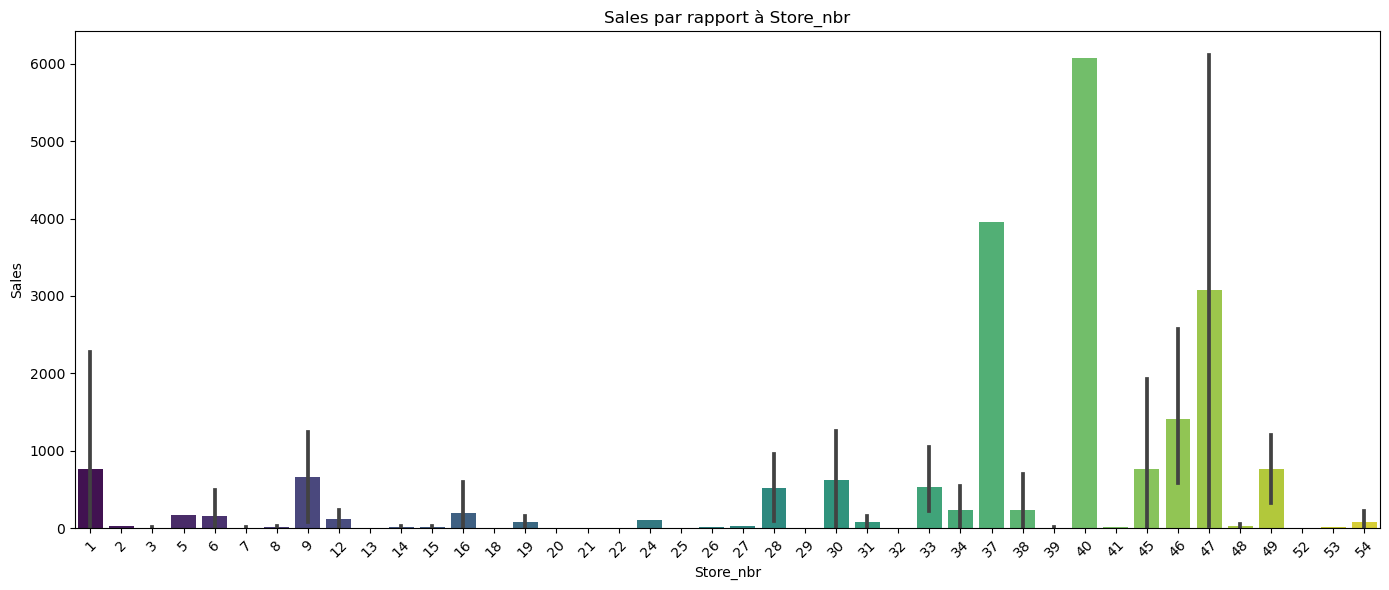

In [5]:
# Filtrer les données pour un échantillon représentatif 
subset_data = train_data.sample(n=100, random_state=42)

# Diagramme à barres pour Sales par rapport à Family
plt.figure(figsize=(14, 6))
sns.barplot(x='family', y='sales', data=subset_data, palette='viridis')
plt.title('Sales par rapport à Family')
plt.xlabel('Family')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Diagramme à barres pour Sales par rapport à Store_nbr
plt.figure(figsize=(14, 6))
sns.barplot(x='store_nbr', y='sales', data=subset_data, palette='viridis')
plt.title('Sales par rapport à Store_nbr')
plt.xlabel('Store_nbr')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

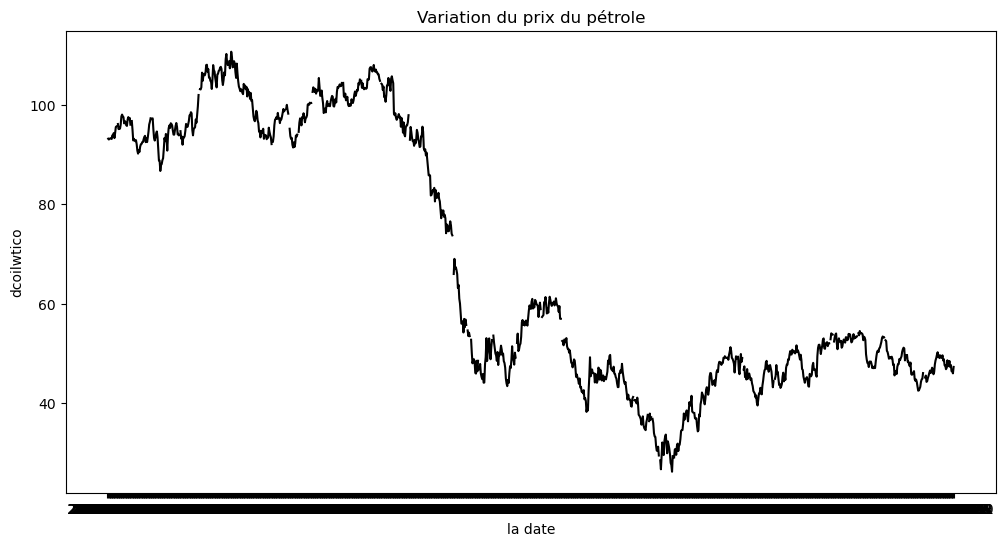

In [6]:
# Graphe de la Variation du prix du pétrole
plt.figure(figsize=(12, 6))
plt.plot(oil_data['date'],oil_data["dcoilwtico"] , color='black')
plt.xlabel('la date')
plt.ylabel('dcoilwtico')
plt.title("Variation du prix du pétrole")
plt.show()

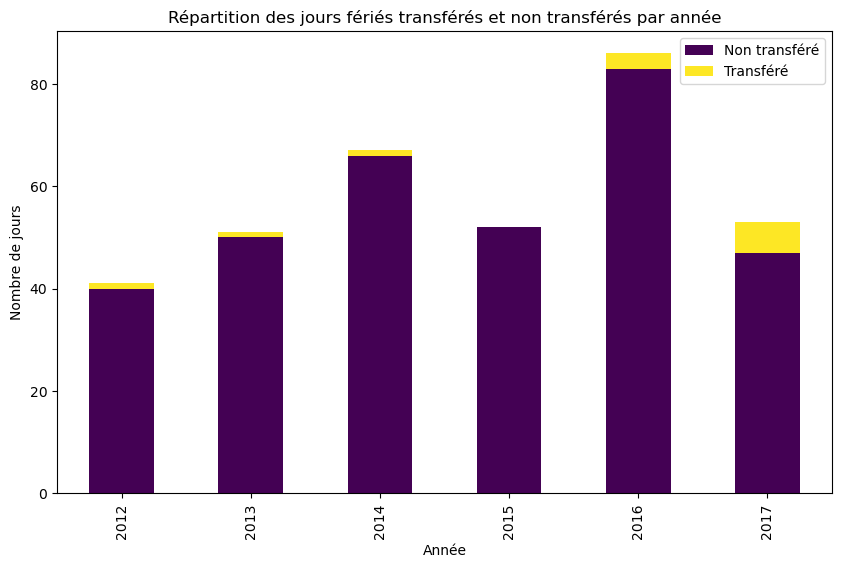

In [7]:
# Convertissez la colonne 'date' en datetime si ce n'est pas déjà le cas
holidays_data['date'] = pd.to_datetime(holidays_data['date'])

# Utilisez la fonction groupby pour regrouper les données par année et par type de transfert
grouped_data = holidays_data.groupby([holidays_data['date'].dt.year, 'transferred']).size().unstack(fill_value=0)

# Tracez le graphique à barres empilées
grouped_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Répartition des jours fériés transférés et non transférés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de jours")
plt.legend(["Non transféré", "Transféré"])
plt.show()

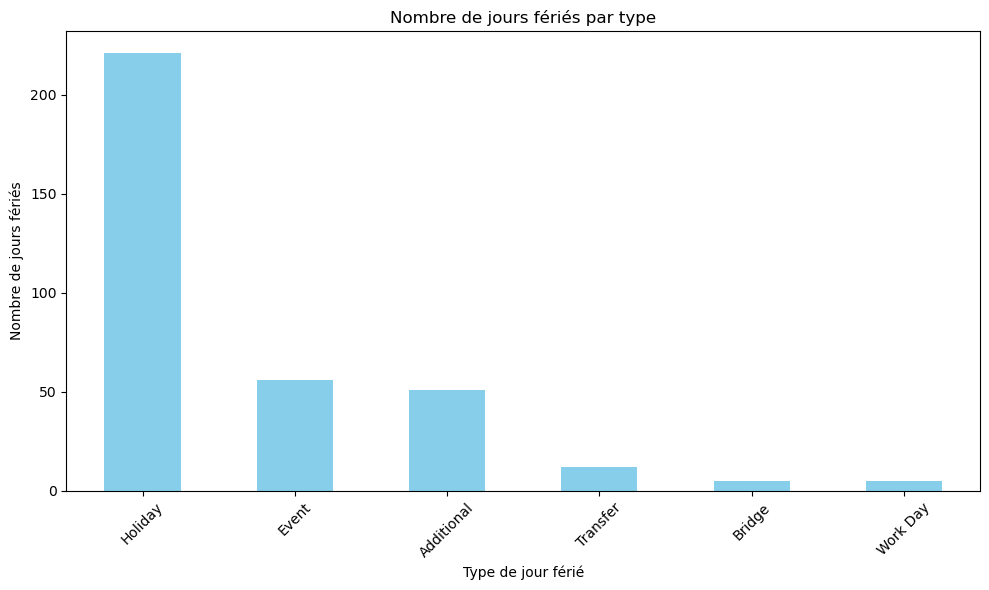

In [8]:
# Triez les données par date
holidays_data = holidays_data.sort_values(by='date')

# Créez un histogramme du nombre de jours fériés par type
plt.figure(figsize=(10, 6))
holidays_data['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Nombre de jours fériés par type")
plt.xlabel("Type de jour férié")
plt.ylabel("Nombre de jours fériés")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Convertir la colonne 'date' en datetime64[ns] dans oil_data
oil_data['date'] = pd.to_datetime(oil_data['date'])

# Effectuer la jointure
calendar = pd.merge(calendar, oil_data, how='left', on='date')

calendar


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN
...,...,...
1699,2017-08-27,NaN
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [10]:
# Remplissage des valeurs manquantes (NaN) dans la colonne 'dcoilwtico'
calendar['dcoilwtico'].fillna(method='ffill', inplace=True)
calendar['dcoilwtico'].fillna(method='bfill', inplace=True)

calendar

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,93.12
...,...,...
1699,2017-08-27,47.65
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [11]:
# Ajouter une colonne pour le jour de la semaine (0 pour lundi, 1 pour mardi, ..., 6 pour dimanche)
calendar['day_week'] = calendar['date'].dt.dayofweek

# Ajouter une colonne 'holiday_or_weekday' avec la valeur par défaut 'weekday'
calendar['holiday_or_weekday'] = 'weekday'

# Modifier la valeur de 'holiday_or_weekday' à 'holiday' pour les jours de la semaine > 4 (samedi et dimanche)
calendar.loc[calendar['day_week'] > 4, 'holiday_or_weekday'] = 'holiday'

# Afficher les premières lignes du DataFrame résultant
calendar.head()


,date,dcoilwtico,day_week,holiday_or_weekday
0,2013-01-01,93.14,1,weekday
1,2013-01-02,93.14,2,weekday
2,2013-01-03,92.97,3,weekday
3,2013-01-04,93.12,4,weekday
4,2013-01-05,93.12,5,holiday


In [12]:
holidays_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [13]:
unique_types = holidays_data['type'].unique()
print(unique_types)

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']


In [14]:
# Convertir la colonne 'date' en datetime64[ns] dans oil_data
holidays_data['date'] = pd.to_datetime(holidays_data['date'])

# Effectuer la jointure
calendar = pd.merge(calendar, holidays_data, how='left', on='date')

calendar

,date,dcoilwtico,day_week,holiday_or_weekday,type,locale,locale_name,description,transferred
0,2013-01-01,93.14,1,weekday,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,93.14,2,weekday,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,92.97,3,weekday,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,93.12,4,weekday,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,93.12,5,holiday,Work Day,National,Ecuador,Recupero puente Navidad,False
...,...,...,...,...,...,...,...,...,...
1729,2017-08-27,47.65,6,holiday,NaN,NaN,NaN,NaN,NaN
1730,2017-08-28,46.40,0,weekday,NaN,NaN,NaN,NaN,NaN
1731,2017-08-29,46.46,1,weekday,NaN,NaN,NaN,NaN,NaN
1732,2017-08-30,45.96,2,weekday,NaN,NaN,NaN,NaN,NaN


In [15]:
# Modifier la colonne 'holiday_or_weekday' pour les jours de type 'Work Day'
calendar.loc[calendar.type.isin(['Work Day', 'Event']), 'holiday_or_weekday'] = 'weekday'

# Modifier la colonne 'holiday_or_weekday' pour les jours de type 'Bridge' et 'Transfer'
calendar.loc[calendar.type.isin(['Bridge', 'Transfer, Additional']), 'holiday_or_weekday'] = 'holiday'

# Modifier la colonne 'holiday_or_weekday' pour les jours de type 'Holiday' avec transferred=False
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == False), 'holiday_or_weekday'] = 'holiday'

# Modifier la colonne 'holiday_or_weekday' pour les jours de type 'Holiday' avec transferred=True
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == True), 'holiday_or_weekday'] = 'weekday'

# Filtrer les colonnes souhaitées
calendar = calendar[['date', 'dcoilwtico', 'day_week', 'holiday_or_weekday']]

calendar


,date,dcoilwtico,day_week,holiday_or_weekday
0,2013-01-01,93.14,1,holiday
1,2013-01-02,93.14,2,weekday
2,2013-01-03,92.97,3,weekday
3,2013-01-04,93.12,4,weekday
4,2013-01-05,93.12,5,weekday
...,...,...,...,...
1729,2017-08-27,47.65,6,holiday
1730,2017-08-28,46.40,0,weekday
1731,2017-08-29,46.46,1,weekday
1732,2017-08-30,45.96,2,weekday


In [16]:
# Afficher le nombre de valeurs manquantes par colonne
print(calendar.isnull().sum())

date                  0
dcoilwtico            0
day_week              0
holiday_or_weekday    0
dtype: int64


In [17]:
# Combinaison avec train_data
train_data['date'] = pd.to_datetime(train_data['date'])
combined_train = pd.merge(train_data, calendar, how='left', on='date')

# Combinaison avec test_data
test_data['date'] = pd.to_datetime(test_data['date'])
combined_test = pd.merge(test_data, calendar, how='left', on='date')


In [18]:
combined_train.dtypes

id                             int64
date                  datetime64[ns]
store_nbr                      int64
family                        object
sales                        float64
onpromotion                    int64
dcoilwtico                   float64
day_week                       int64
holiday_or_weekday            object
dtype: object

In [19]:
# Instancier le LabelEncoder
label_encoder = LabelEncoder()

# Liste des colonnes catégorielles à encoder
categorical_columns = ['family', 'holiday_or_weekday']

# Appliquer le LabelEncoder sur les DataFrames
for col in categorical_columns:
    # Pour combined_train
    combined_train[col + '_encoded'] = label_encoder.fit_transform(combined_train[col])
    
    # Pour combined_test
    combined_test[col + '_encoded'] = label_encoder.transform(combined_test[col])

# Supprimer les colonnes catégorielles originales si nécessaire
combined_train = combined_train.drop(columns=categorical_columns)
combined_test = combined_test.drop(columns=categorical_columns)


In [20]:
combined_train

,id,date,store_nbr,sales,onpromotion,dcoilwtico,day_week,family_encoded,holiday_or_weekday_encoded
0,0,2013-01-01,1,0.000,0,93.14,1,0,0
1,1,2013-01-01,1,0.000,0,93.14,1,1,0
2,2,2013-01-01,1,0.000,0,93.14,1,2,0
3,3,2013-01-01,1,0.000,0,93.14,1,3,0
4,4,2013-01-01,1,0.000,0,93.14,1,4,0
...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,438.133,0,47.57,1,28,0
3054344,3000884,2017-08-15,9,154.553,1,47.57,1,29,0
3054345,3000885,2017-08-15,9,2419.729,148,47.57,1,30,0
3054346,3000886,2017-08-15,9,121.000,8,47.57,1,31,0


In [21]:
combined_test

,id,date,store_nbr,onpromotion,dcoilwtico,day_week,family_encoded,holiday_or_weekday_encoded
0,3000888,2017-08-16,1,0,46.80,2,0,1
1,3000889,2017-08-16,1,0,46.80,2,1,1
2,3000890,2017-08-16,1,2,46.80,2,2,1
3,3000891,2017-08-16,1,20,46.80,2,3,1
4,3000892,2017-08-16,1,0,46.80,2,4,1
...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,1,47.26,3,28,1
28508,3029396,2017-08-31,9,0,47.26,3,29,1
28509,3029397,2017-08-31,9,1,47.26,3,30,1
28510,3029398,2017-08-31,9,9,47.26,3,31,1


In [22]:
# Vérifier les valeurs manquantes dans combined_train
missing_values_train = combined_train.isnull().sum()
print("Valeurs manquantes dans combined_train :")
print(missing_values_train)

# Vérifier les valeurs manquantes dans combined_test
missing_values_test = combined_test.isnull().sum()
print("\nValeurs manquantes dans combined_test :")
print(missing_values_test)

Valeurs manquantes dans combined_train :
id                            0
date                          0
store_nbr                     0
sales                         0
onpromotion                   0
dcoilwtico                    0
day_week                      0
family_encoded                0
holiday_or_weekday_encoded    0
dtype: int64

Valeurs manquantes dans combined_test :
id                            0
date                          0
store_nbr                     0
onpromotion                   0
dcoilwtico                    0
day_week                      0
family_encoded                0
holiday_or_weekday_encoded    0
dtype: int64


Mean Squared Error (MSE): 1194127.154006993
Mean Absolute Error (MAE): 501.0397270666805
R-squared (R2): 0.3592194871145582


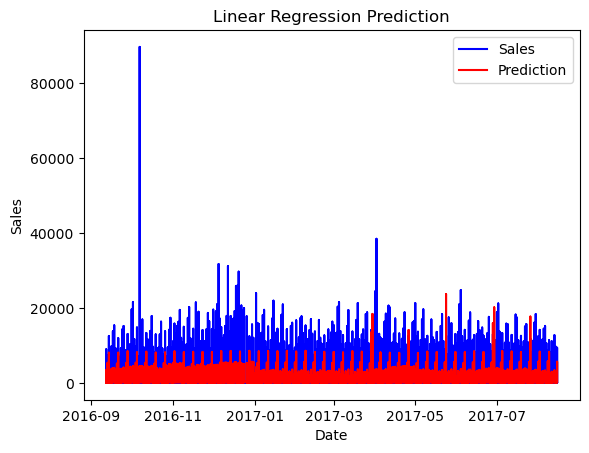

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sélection des données
n = np.where(combined_train['date'] == pd.Timestamp((combined_train['date'].iloc[int(0.8 * len(combined_train))].date())))[0][0]-1
train = np.arange(0, n)
test = np.arange(n + 1, len(combined_train))

data_train = combined_train.loc[train]
data_test = combined_train.loc[test]

# Régression linéaire
features = ['dcoilwtico', 'day_week', 'family_encoded', 'holiday_or_weekday_encoded', 'store_nbr', 'onpromotion']
X_train = data_train[features].values
y_train = data_train['sales'].values
X_test = data_test[features].values
y_test = data_test['sales'].values

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

data_train['Prediction'] = reg_lin.predict(X_train)
data_test['Prediction'] = reg_lin.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, data_test['Prediction'])
mae = mean_absolute_error(y_test, data_test['Prediction'])
r2 = r2_score(y_test, data_test['Prediction'])

# Affichage des métriques
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Tracé
plt.plot(data_test['date'], data_test['sales'], label='Sales', color='blue')
plt.plot(data_test['date'], data_test['Prediction'], label='Prediction', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Linear Regression Prediction')
plt.show()



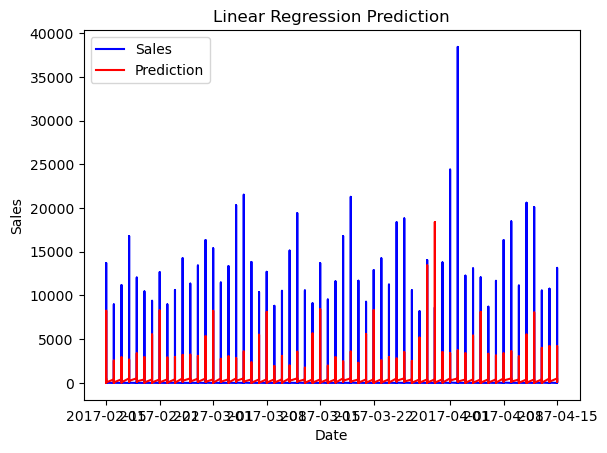

In [24]:
# Tracé pour la période spécifiée
start_date = pd.Timestamp('2017-02-15')
end_date = pd.Timestamp('2017-04-15')

data_test_viz = data_test[(data_test['date'] >= start_date) & (data_test['date'] <= end_date)]

plt.plot(data_test_viz['date'], data_test_viz['sales'], label='Sales', color='blue')
plt.plot(data_test_viz['date'], data_test_viz['Prediction'], label='Prediction', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Linear Regression Prediction')
plt.show()


In [ ]:
# Online Linear Regression
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

data_test['PrevisionOnline'] = np.nan
data_test['PrevisionOnlineWeighted'] = np.nan
mu = 0.999
batch_size = 48 * 7

for t in range(1, (len(data_test) // batch_size) + 2):
    if t == 1:
        reg_linW = reg_lin
    else:
        data_train_online = pd.concat([data_train, data_test.iloc[:(t - 1) * batch_size]]).copy()
        reg_lin = LinearRegression()
        reg_lin.fit(data_train_online[features], data_train_online['sales'])
        
        weights = mu ** np.arange(len(data_train_online), 0, -1)
        
        reg_linW = LinearRegression()
        reg_linW.fit(data_train_online[features], data_train_online['sales'], sample_weight=weights)
    
    start_idx = (t - 1) * batch_size
    end_idx = min(t * batch_size, len(data_test))
    
    
    data_test['PrevisionOnline'].iloc[start_idx:end_idx] = reg_lin.predict(data_test[features].iloc[start_idx:end_idx])
    data_test['PrevisionOnlineWeighted'].iloc[start_idx:end_idx] = reg_linW.predict(data_test[features].iloc[start_idx:end_idx])

# MAPE for Online Linear Regression
mape_online = mape(data_test['sales'], data_test['PrevisionOnline'])
mape_online_weighted = mape(data_test['sales'], data_test['PrevisionOnlineWeighted'])

print(f'The MAPE in prediction is {mape_online:.2f}%.')
print(f'The MAPE in prediction is {mape_online_weighted:.2f}%.')


C:\Users\Galaye MBENGUE\AppData\Local\Temp\ipykernel_34808\2957844713.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['PrevisionOnline'].iloc[start_idx:end_idx] = reg_lin.predict(data_test[features].iloc[start_idx:end_idx])
C:\Users\Galaye MBENGUE\AppData\Local\Temp\ipykernel_34808\2957844713.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['PrevisionOnlineWeighted'].iloc[start_idx:end_idx] = reg_linW.predict(data_test[features].iloc[start_idx:end_idx])
C:\Users\Galaye MBENGUE\AppData\Local\Temp\ipykernel_34808\2957844713.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy

MSE Ridge: 1194127.24
R² Ridge: 0.36
MedAE Ridge: 302.73


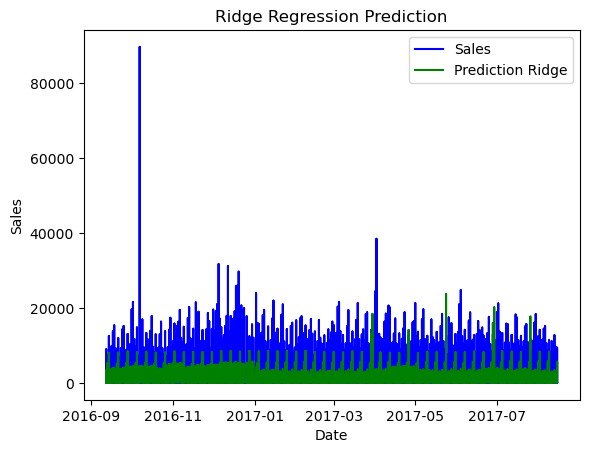

In [33]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Régression ridge
ridge_alpha = 1.0  # Paramètre de régularisation alpha
scaler = StandardScaler()

# Standardisation des caractéristiques
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train_scaled, y_train)

data_train['Prediction_Ridge'] = ridge.predict(X_train_scaled)
data_test['Prediction_Ridge'] = ridge.predict(X_test_scaled)

# Mesure d'évaluation - Erreur quadratique moyenne (MSE) pour Ridge
mse_ridge = mean_squared_error(data_test['sales'], data_test['Prediction_Ridge'])

# Coefficient de détermination (R²) pour Ridge
r2_ridge = r2_score(data_test['sales'], data_test['Prediction_Ridge'])

# Erreur absolue médiane (MedAE) pour Ridge
medae_ridge = median_absolute_error(data_test['sales'], data_test['Prediction_Ridge'])

# Affichage des métriques
print(f'MSE Ridge: {mse_ridge:.2f}')
print(f'R² Ridge: {r2_ridge:.2f}')
print(f'MedAE Ridge: {medae_ridge:.2f}')

# Tracé pour Ridge
plt.plot(data_test['date'], data_test['sales'], label='Sales', color='blue')
plt.plot(data_test['date'], data_test['Prediction_Ridge'], label='Prediction Ridge', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Ridge Regression Prediction')
plt.show()


MAE Lasso: 500.99
MSE Lasso: 1194179.11
RMSE Lasso: 1092.79
R2 Lasso: 0.36


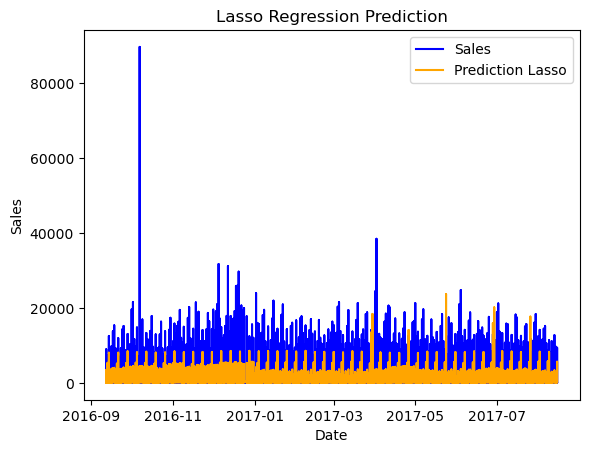

In [36]:
from sklearn.linear_model import Lasso

# Régression Lasso
lasso_alpha = 0.1  # Paramètre de régularisation alpha

lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train_scaled, y_train)

data_train['Prediction_Lasso'] = lasso.predict(X_train_scaled)
data_test['Prediction_Lasso'] = lasso.predict(X_test_scaled)

# Mesures d'évaluation pour Lasso
mae_lasso = mean_absolute_error(data_test['sales'], data_test['Prediction_Lasso'])
mse_lasso = mean_squared_error(data_test['sales'], data_test['Prediction_Lasso'])
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(data_test['sales'], data_test['Prediction_Lasso'])

print(f'MAE Lasso: {mae_lasso:.2f}')
print(f'MSE Lasso: {mse_lasso:.2f}')
print(f'RMSE Lasso: {rmse_lasso:.2f}')
print(f'R2 Lasso: {r2_lasso:.2f}')

# Tracé pour Lasso
plt.plot(data_test['date'], data_test['sales'], label='Sales', color='blue')
plt.plot(data_test['date'], data_test['Prediction_Lasso'], label='Prediction Lasso', color='orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Lasso Regression Prediction')
plt.show()
